###한글 설치

In [ ]:
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
fonts-nanum is already the newest version (20200506-1).
0 upgraded, 0 newly installed, 0 to remove and 35 not upgraded.
/usr/share/fonts: caching, new cache contents: 0 fonts, 1 dirs
/usr/share/fonts/truetype: caching, new cache contents: 0 fonts, 3 dirs
/usr/share/fonts/truetype/humor-sans: caching, new cache contents: 1 fonts, 0 dirs
/usr/share/fonts/truetype/liberation: caching, new cache contents: 16 fonts, 0 dirs
/usr/share/fonts/truetype/nanum: caching, new cache contents: 12 fonts, 0 dirs
/usr/local/share/fonts: caching, new cache contents: 0 fonts, 0 dirs
/root/.local/share/fonts: skipping, no such directory
/root/.fonts: skipping, no such directory
/usr/share/fonts/truetype: skipping, looped directory detected
/usr/share/fonts/truetype/humor-sans: skipping, looped directory detected
/usr/share/fonts/truetype/liberation: skipping, looped directory detected
/usr/share/fonts/truetype/

In [ ]:
import matplotlib.pyplot as plt

plt.rc('font', family='NanumBarunGothic')

### 데이터 가져오기


In [ ]:
import os
import pandas as pd
import numpy as np
import chardet

In [ ]:
# 1) 첫 번째 파일 경로
fp1 = "/content/drive/MyDrive/data_visualization/한국수자원공사_지하수 수위현황_20231231.csv"

# 2) 인코딩 감지 및 로드
raw1 = open(fp1, "rb").read()
enc1 = chardet.detect(raw1)["encoding"]
df1 = pd.read_csv(fp1, encoding=enc1, engine="python", on_bad_lines="skip")

# 3) 실제 컬럼명 출력
print("첫 번째 파일 컬럼명:", df1.columns.tolist())

# 4) 존재하는 컬럼만 골라서 리네임
rename_map1 = {
    "조사년도": "year",
    "관측소명": "station",
    "관정구분": "well_type",
    "평균수위": "water_level",
    "표고": "elevation",
    "심도": "depth"
}
# 리네임 맵 중 실제 컬럼에 있는 것만 필터
valid_map1 = {k:v for k,v in rename_map1.items() if k in df1.columns}
df1 = df1.rename(columns=valid_map1)
print("리네임 후 컬럼명:", df1.columns.tolist())


첫 번째 파일 컬럼명: ['조사년도', '관측소명', '관정구분', '평균수위', '표고', '심도']
리네임 후 컬럼명: ['year', 'station', 'well_type', 'water_level', 'elevation', 'depth']


In [ ]:
# 1) 두 번째 파일 경로
fp2 = "/content/drive/MyDrive/data_visualization/한국수자원공사_지하수수위현황.csv"

# 2) 인코딩 감지 및 로드
raw2 = open(fp2, "rb").read()
enc2 = chardet.detect(raw2)["encoding"]
df2 = pd.read_csv(fp2, encoding=enc2, engine="python", on_bad_lines="skip")

# 3) 실제 컬럼명 출력
print("두 번째 파일 컬럼명:", df2.columns.tolist())

# 4) 존재하는 컬럼만 골라서 리네임
rename_map2 = {
    "조사년도": "year",
    "관측소명": "station",
    "관정명": "well_type",
    "평균수위(센티미터)": "water_level",
    "표고(미터)": "elevation",
    "심도(미터)": "depth"
}
valid_map2 = {k:v for k,v in rename_map2.items() if k in df2.columns}
df2 = df2.rename(columns=valid_map2)
print("리네임 후 컬럼명:", df2.columns.tolist())


두 번째 파일 컬럼명: ['조사년도', '관측소명', '관정명', '평균수위(센티미터)', '표고(미터)', '심도(미터)']
리네임 후 컬럼명: ['year', 'station', 'well_type', 'water_level', 'elevation', 'depth']


In [ ]:
# 1) 세 번째 파일 경로
fp3 = "/content/drive/MyDrive/data_visualization/한국수자원공사_지하수수위현황_20230426.csv"

# 2) 인코딩 감지 및 로드
raw3 = open(fp3, "rb").read()
enc3 = chardet.detect(raw3)["encoding"]
df3 = pd.read_csv(fp3, encoding=enc3, engine="python", on_bad_lines="skip")

# 3) 실제 컬럼명 출력
print("세 번째 파일 컬럼명:", df3.columns.tolist())

# 4) 존재하는 컬럼만 골라서 리네임
rename_map3 = {
    "조사년도": "year",
    "관측소명": "station",
    "관정명": "well_type",
    "평균수위": "water_level",
    "표고": "elevation",
    "평균심도": "depth"
}
valid_map3 = {k:v for k,v in rename_map3.items() if k in df3.columns}
df3 = df3.rename(columns=valid_map3)
print("리네임 후 컬럼명:", df3.columns.tolist())


세 번째 파일 컬럼명: ['조사년도', '관측소명', '관정명', '평균수위', '표고', '평균심도']
리네임 후 컬럼명: ['year', 'station', 'well_type', 'water_level', 'elevation', 'depth']


In [ ]:
import pandas as pd

# 1) 앞서 만든 df1, df2, df3을 하나로 합치기
raw = pd.concat([df1, df2, df3], ignore_index=True)
print(f"▶ 전체 행수(병합 전): {len(raw)}")

# 2) station별로 고유 연도 개수 세기
year_counts = raw.groupby("station")["year"].nunique()

# 3) 3년 모두 관측된 station 목록
valid_stations = year_counts[year_counts == 3].index.tolist()
print(f"✔️ 3년 연속 관측된 station 수: {len(valid_stations)}")

# 4) 유효 station만 필터링
filtered = raw[raw["station"].isin(valid_stations)].copy()
print(f"▶ 필터 후 행수: {len(filtered)}")

# 5) 결과 CSV로 저장
out_path = "groundwater_3year_stations.csv"
filtered.to_csv(out_path, index=False, encoding="utf-8-sig")
print(f"✅ 3년 연속 관측소 데이터 저장됨: {out_path}")


▶ 전체 행수(병합 전): 3028
✔️ 3년 연속 관측된 station 수: 698
▶ 필터 후 행수: 2621
✅ 3년 연속 관측소 데이터 저장됨: groundwater_3year_stations.csv


###전처리


In [ ]:
import pandas as pd
import json

# 1) 지하수 데이터 불러오기
df = pd.read_csv("/content/groundwater_3year_stations.csv", encoding="utf-8-sig")

# 2) 행정구역 경계 JSON 로드
with open("/content/drive/MyDrive/KOR_SIGU.json", encoding="utf-8") as f:
    sigu_geo = json.load(f)
with open("/content/drive/MyDrive/KOR_SIDO.json", encoding="utf-8") as f:
    sido_geo = json.load(f)

# 3) 도(시도) 코드 → 도명 맵핑
province_map = {
    feat["properties"]["CTPRVN_CD"]: feat["properties"]["CTP_KOR_NM"]
    for feat in sido_geo["features"]
}

# 4) 시·군·구 접두어(prefix) → (sigungu, province) 맵핑 생성
mapping = {}
for feat in sigu_geo["features"]:
    sig_name = feat["properties"]["SIG_KOR_NM"]  # ex: "가평군"
    prefix   = sig_name[:-1]                     # ex: "가평"
    sig_cd    = feat["properties"]["SIG_CD"]     # ex: "42130"
    prov_cd   = sig_cd[:2]                       # ex: "42"
    mapping[prefix] = (sig_name, province_map.get(prov_cd))

# 5) 긴 prefix 우선 순으로 매칭 함수 정의
prefixes = sorted(mapping.keys(), key=len, reverse=True)
def extract_admin(st):
    for p in prefixes:
        if isinstance(st, str) and st.startswith(p):
            return mapping[p]
    return (None, None)

# 6) sigungu, province 컬럼 생성
df[["sigungu","province"]] = df["station"].apply(
    lambda x: pd.Series(extract_admin(x))
)

# 7) 결과 저장
df.to_csv("groundwater_with_region.csv", index=False, encoding="utf-8-sig")
print("✅ 시·군·구 및 도 컬럼 추가 완료: groundwater_with_region.csv")


✅ 시·군·구 및 도 컬럼 추가 완료: groundwater_with_region.csv


In [ ]:
mapping = (
    pd.read_csv("/content/groundwater_with_region.csv", encoding="utf-8-sig")
      [["station","sigungu","province"]]
      .drop_duplicates()
)
print(f"✔️ 매핑 건수: {len(mapping)}")

df = pd.read_csv("groundwater_3year_stations.csv", encoding="utf-8-sig")
print(f"▶ 분석 대상 전체 행수: {len(df)}")

# 3) station 기준으로 province, sigungu 병합
df = df.merge(mapping, on="station", how="left")
print("병합 후 예시:")
print(df.head())

✔️ 매핑 건수: 698
▶ 분석 대상 전체 행수: 2621
병합 후 예시:
   year   station well_type  water_level  elevation  depth sigungu province
0  2023      가평가평        암반        58.62     61.213  130.0     가평군      경기도
1  2023      가평가평        충적        58.67     61.267    7.5     가평군      경기도
2  2023  가평달전_심부2        암반       113.29    127.340   80.0     가평군      경기도
3  2023   가평달전_천부        충적       113.34    127.340   18.0     가평군      경기도
4  2023      가평북면        암반       110.35    120.650   69.0     가평군      경기도


In [ ]:
import pandas as pd

# 1) 데이터 불러오기
df = pd.read_csv("groundwater_with_region.csv", encoding="utf-8-sig")

# 2) 충적층(alluvium) 관측소만 필터
df_alluvium = df[df["well_type"] == "충적"].copy()
print(f"✔️ 충적층 관측소 건수: {len(df_alluvium)}")

# 3) 시도·시군구·연도별 합산
grouped = (
    df_alluvium
    .groupby(["province", "sigungu", "year"], as_index=False)
    [["water_level", "elevation", "depth"]]
    .sum()
)

# 4) 정렬 (시군구 오름차순, 연도 오름차순)
grouped = grouped.sort_values(by=["province","sigungu","year"], ascending=[True,True,True])

# 5) 결과 확인
print(grouped.head(10))

# 6) 저장
out_path = "groundwater_alluvium_sum_by_sigungu_year.csv"
grouped.to_csv(out_path, index=False, encoding="utf-8-sig")
print(f"✅ 충적층 시·군·구·연도별 합산 파일 생성됨: {out_path}")


✔️ 충적층 관측소 건수: 909
  province sigungu  year  water_level  elevation  depth
0      강원도     강릉시  2021        52.51     61.660   9.15
1      강원도     강릉시  2022        53.28     61.660  21.00
2      강원도     강릉시  2023        53.35     61.660  21.00
3      강원도     동해시  2021         5.45     13.960   8.51
4      강원도     동해시  2022         6.36     13.960  12.00
5      강원도     동해시  2023         6.17     13.960  12.00
6      강원도     삼척시  2021       355.67    375.956  20.29
7      강원도     삼척시  2022       361.78    375.956  34.00
8      강원도     삼척시  2023       362.51    375.956  34.00
9      강원도     속초시  2021        63.38     71.295   7.92
✅ 충적층 시·군·구·연도별 합산 파일 생성됨: groundwater_alluvium_sum_by_sigungu_year.csv


In [ ]:
import pandas as pd
import numpy as np

# 1) 시·군·구·연도별 합산 파일 불러오기
df = pd.read_csv(
    "/content/groundwater_alluvium_sum_by_sigungu_year.csv",
    encoding="utf-8-sig"
)
df["year"] = df["year"].astype(int)

# 2) 비교할 연도 지정
year0, year1 = 2021, 2022

# 3) 2021→2022 직접 변화율(절대값) 계산
records = []
for (prov, sig), subgrp in df.groupby(["province","sigungu"]):
    sub = subgrp.set_index("year")
    if not {year0, year1}.issubset(sub.index):
        continue

    v0 = sub.at[year0, "water_level"]
    v1 = sub.at[year1, "water_level"]
    pct = abs((v1 - v0) / v0 * 100) if v0 != 0 else np.nan

    records.append({
        "province": prov,
        "sigungu":  sig,
        f"water_level_abs_pct_{year0}->{year1}": pct
    })

pct_df = pd.DataFrame(records)
col = f"water_level_abs_pct_{year0}->{year1}"



# 5) 결과 저장
out_path = "sigungu_waterlevel_abs_pct_2021_2022_clean.csv"
clean_df.to_csv(out_path, index=False, encoding="utf-8-sig")
print(f"✅ 이상치 제거된 변화율 파일 생성: {out_path}")


✅ 이상치 제거된 변화율 파일 생성: sigungu_waterlevel_abs_pct_2021_2022_clean.csv


In [ ]:
import pandas as pd

# 1) 시·군·구·연도별 합산 파일 불러오기
df = pd.read_csv("/content/groundwater_alluvium_sum_by_sigungu_year.csv",
                 encoding="utf-8-sig")

# 2) year를 정수형으로 변환 & 고유 연도 확인
df["year"] = df["year"].astype(int)
years = sorted(df["year"].unique())
first, last = years[0], years[-1]
print("▶ 파일에 포함된 연도:", years)

# 3) 2021→2023 직접 변화율(절대값) 계산
records = []
for (prov, sig), subgrp in df.groupby(["province","sigungu"]):
    sub = subgrp.set_index("year")
    # 두 해 모두 있어야 계산 가능
    if first not in sub.index or last not in sub.index:
        continue

    v0 = sub.at[first, "water_level"]
    v2 = sub.at[last,  "water_level"]
    # 절대값을 씌워서 양수로 만들기
    pct = abs((v2 - v0) / v0 * 100) if v0 != 0 else 0

    records.append({
        "province": prov,
        "sigungu":  sig,
        f"water_level_abs_pct_{first}->{last}": pct
    })

pct_df = pd.DataFrame(records)

# 4) 결과 확인 및 저장
print(pct_df.head())
out_path = "sigungu_waterlevel_abs_pct_2021_2023.csv"
pct_df.to_csv(out_path, index=False, encoding="utf-8-sig")
print(f"✅ 절대값 퍼센트 변화율 파일 생성: {out_path}")


▶ 파일에 포함된 연도: [np.int64(2021), np.int64(2022), np.int64(2023)]
  province sigungu  water_level_abs_pct_2021->2023
0      강원도     강릉시                        1.599695
1      강원도     동해시                       13.211009
2      강원도     삼척시                        1.923131
3      강원도     속초시                        2.492900
4      강원도     양구군                        1.311711
✅ 절대값 퍼센트 변화율 파일 생성: sigungu_waterlevel_abs_pct_2021_2023.csv


###시각화

In [ ]:
import json
import geopandas as gpd
import matplotlib.pyplot as plt

Columns: ['침하형태', '수']


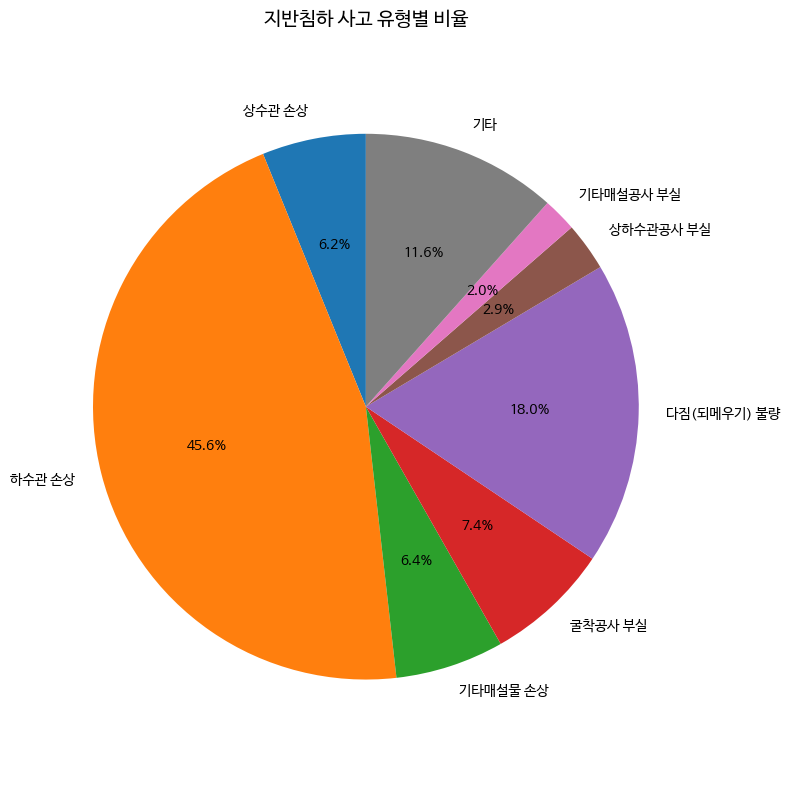

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# 1) 데이터 불러오기
#    파일명에 공백이나 특수문자가 있으면 r-string을 쓰거나 raw path를 정확히 지정하세요.
df = pd.read_csv(
    r"/content/drive/MyDrive/지반침하발생현황(침하형태분류별) (1).csv",
    encoding="utf-8-sig"
)

# 2) 컬럼명 확인 및 리네임 (예: "침하형태", "합계")
print("Columns:", df.columns.tolist())
# 가령 컬럼명이 ['침하형태', '합계'] 라고 나오면:
df = df.rename(columns={
    "침하형태": "type",
    "수":     "count"
})

# 3) 불필요한 행(예: 건수 0)이 있으면 필터링
df = df[df["count"] > 0]

# 4) 파이 차트 그리기
plt.figure(figsize=(8,8))
plt.pie(
    df["count"],
    labels=df["type"],
    autopct="%1.1f%%",
    startangle=90
)
plt.title("지반침하 사고 유형별 비율", fontsize=14)
plt.axis("equal")  # 원이 제대로 보이도록
plt.tight_layout()
plt.show()


이상치 임계치: 4.70%, 이상치 개수: 17


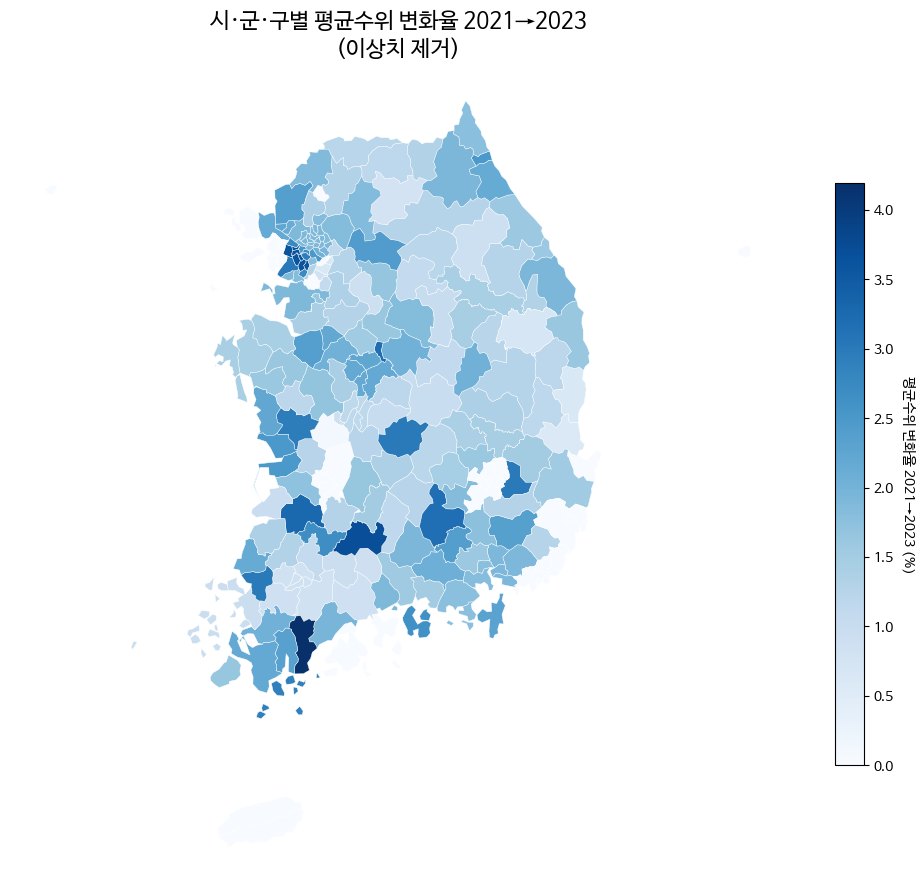

In [ ]:
import json
import geopandas as gpd
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# 1) 변화율(%) 데이터 로드
pct = pd.read_csv("/content/sigungu_waterlevel_abs_pct_2021_2023.csv",
                  encoding="utf-8-sig")
col = "water_level_abs_pct_2021->2023"

# 2) IQR 방식 이상치 제거 → NaN
s = pct[col].abs()
q1, q3 = s.quantile([0.25, 0.75])
iqr = q3 - q1
threshold = q3 + 1.5 * iqr
pct.loc[s > threshold, col] = np.nan
print(f"이상치 임계치: {threshold:.2f}%, 이상치 개수: {(s>threshold).sum()}")

# 3) 시·군·구 경계 GeoJSON & 시도 매핑
gdf = gpd.read_file("/content/drive/MyDrive/KOR_SIGU.json", encoding="utf-8")
with open("/content/drive/MyDrive/KOR_SIDO.json", encoding="utf-8") as f:
    sido = json.load(f)
prov_map = {feat["properties"]["CTPRVN_CD"]: feat["properties"]["CTP_KOR_NM"]
            for feat in sido["features"]}
gdf["province"] = gdf["SIG_CD"].str[:2].map(prov_map)

# 4) 변화율 병합
gdf = gdf.merge(pct[["sigungu", col]],
                left_on="SIG_KOR_NM", right_on="sigungu", how="left")

# 5) CRS 변환 & 공간 인덱스
gdf = gdf.to_crs(epsg=3857)
sindex = gdf.sindex

# 6) NaN 보간:
#    (1) 같은 시도 내 인접 이웃 평균 →
#    (2) 모든 인접 이웃 평균
for idx, row in gdf[gdf[col].isna()].iterrows():
    geom, prov = row.geometry, row.province
    # 후보 인덱스
    cand = list(sindex.intersection(geom.bounds))
    neigh = gdf.loc[[i for i in cand if i!=idx]]
    neigh = neigh[neigh.geometry.touches(geom)]
    # 같은 시도
    samep = neigh[(neigh.province==prov) & neigh[col].notna()][col]
    if not samep.empty:
        gdf.at[idx, col] = samep.mean()
    else:
        anyp = neigh[neigh[col].notna()][col]
        gdf.at[idx, col] = anyp.mean() if not anyp.empty else 0

# 7) 다시 WGS84로 복귀
gdf = gdf.to_crs(epsg=4326)

# 8) Choropleth 시각화 (Blues)
vmax = gdf[col].max(skipna=True)
sm = plt.cm.ScalarMappable(cmap="Blues",
                           norm=plt.Normalize(vmin=0, vmax=vmax))
sm._A = []

fig, ax = plt.subplots(figsize=(10,10))
gdf.plot(column=col, cmap="Blues", vmin=0, vmax=vmax,
         edgecolor="white", linewidth=0.3, legend=False, ax=ax)
cbar = fig.colorbar(sm, ax=ax, shrink=0.6)
cbar.set_label("평균수위 변화율 2021→2023 (%)", rotation=270, labelpad=15)

ax.set_title("시·군·구별 평균수위 변화율 2021→2023\n(이상치 제거)", fontsize=16)
ax.axis("off")
plt.tight_layout()
plt.show()


In [ ]:
out_csv = "sigungu_waterlevel_pct_interpolated.csv"
gdf[["SIG_KOR_NM", "province", col]].to_csv(
    out_csv,
    index=False,
    encoding="utf-8-sig"
)

###예측모델

In [ ]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.pipeline import Pipeline
from sklearn.metrics import r2_score, mean_absolute_error
import matplotlib.pyplot as plt
import geopandas as gpd

In [ ]:
import pandas as pd

# 1) 시군구별 직접 변화율(%) → 시도별 평균 수위 변화율
pct_sg = pd.read_csv("/content/sigungu_waterlevel_abs_pct_2021_2023.csv", encoding="utf-8-sig")
prov_wl = (
    pct_sg
    .groupby("province", as_index=False)
    .agg(wl_pct_mean=("water_level_abs_pct_2021->2023", "mean"))
)

# 2) 지반침하 발생 현황 불러오기 및 정리
subs = pd.read_csv("/content/drive/MyDrive/data_visualization/지반침하발생현황(지역별).csv", encoding="utf-8-sig")
subs = (
    subs[subs["지역"] != "합계"]
    [["지역","합계"]]
    .rename(columns={"지역":"province","합계":"occurrences_2023"})
)

# 3) 굴착깊이별 데이터 불러오기 및 정리
exc = pd.read_csv("/content/drive/MyDrive/data_visualization/굴착깊이별_2023년_전국.csv", encoding="utf-8-sig")
exc = (
    exc[exc["시설수(개소)"] != "합계"]
    .rename(columns={
        "시설수(개소)": "province",
        "160m이상 시설수(개소)": "exc_facility_160m",
        "160m 이상 이용량(㎥/년)": "exc_usage_160m"
    })
    [["province","exc_facility_160m","exc_usage_160m"]]
)

# 4) 병합
df = (
    prov_wl
    .merge(subs, on="province")
    .merge(exc, on="province", how="left")
    .fillna({"facility_count_all":0, "exc_facility_160m":0, "exc_usage_160m":0})
)

# 5) 최종 확인 및 저장
print(df.head())
out_path = "model_dataset_by_province.csv"
df.to_csv(out_path, index=False, encoding="utf-8-sig")
print(f"✅ 모델용 데이터셋 저장됨: {out_path}")


  province  wl_pct_mean  occurrences_2023 exc_facility_160m exc_usage_160m
0      경기도    19.221101                26             1,101      9,434,581
1     경상남도     2.920774                 9               742      6,638,527
2     경상북도     1.407231                 8               805      7,931,364
3    인천광역시     8.097166                 2                93        355,648
4     전라남도     6.347244                 4               350      4,410,659
✅ 모델용 데이터셋 저장됨: model_dataset_by_province.csv


In [ ]:
import pandas as pd

# 1) 시군구별 직접 변화율(%) → 시도별 평균 수위 변화율
pct_sg = pd.read_csv("sigungu_waterlevel_abs_pct_2021_2022_clean.csv", encoding="utf-8-sig")
prov_wl = (
    pct_sg
    .groupby("province", as_index=False)
    .agg(wl_pct_mean=("water_level_abs_pct_2021->2022", "mean"))
)

# 2) 지반침하 발생 현황 불러오기 및 정리
subs = pd.read_csv("/content/drive/MyDrive/data_visualization/지반침하발생현황(2022).csv", encoding="utf-8-sig")
subs = (
    subs[subs["지역"] != "합계"]
    [["지역","합계"]]
    .rename(columns={"지역":"province","합계":"occurrences_2022"})
)

# 3) 굴착깊이별 데이터 불러오기 및 정리
exc = pd.read_csv("/content/drive/MyDrive/data_visualization/굴착깊이별_2022년_전국.csv", encoding="utf-8-sig")
exc = (
    exc[exc["지역"] != "합계"]
    .rename(columns={
        "지역": "province",
        "160m이상 시설수(개소)": "exc_facility_160m",
        "160m 이상 이용량(㎥/년)": "exc_usage_160m"
    })
    [["province","exc_facility_160m","exc_usage_160m"]]
)

# 4) 병합
df = (
    prov_wl
    .merge(subs, on="province")
    .merge(exc, on="province", how="left")
    .fillna({"facility_count_all":0, "exc_facility_160m":0, "exc_usage_160m":0})
)

# 5) 최종 확인 및 저장
print(df.head())
out_path = "model_dataset_by_province21-22.csv"
df.to_csv(out_path, index=False, encoding="utf-8-sig")
print(f"✅ 모델용 데이터셋 저장됨: {out_path}")


  province  wl_pct_mean  occurrences_2022 exc_facility_160m exc_usage_160m
0      경기도     1.592803                36             3,429     25,169,580
1     경상남도     1.948770                 4             3,943     23,019,790
2     경상북도     1.092637                16             3,849     28,009,173
3     전라남도     1.934287                 5             1,208     10,160,073
4     전라북도     1.988189                 0                 0              0
✅ 모델용 데이터셋 저장됨: model_dataset_by_province21-22.csv


▶ 2022→2023 예측 R² : 0.081
▶ 2022→2023 예측 MAE: 4.8 건


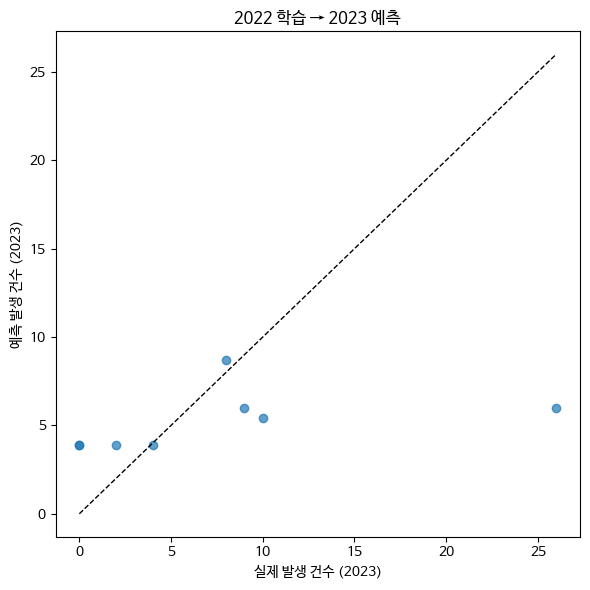

In [ ]:
import pandas as pd
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import r2_score, mean_absolute_error
import matplotlib.pyplot as plt

# 1) 2022 Train 데이터 로드
train = pd.read_csv("model_dataset_by_province21-22.csv", encoding="utf-8-sig")
# 'occurrences_2022' → 'occurrences' 로 통일
train = train.rename(columns={"occurrences_2022": "occurrences"})
# 쉼표 제거 및 float 변환
for c in ["wl_pct_mean","exc_facility_160m","exc_usage_160m","occurrences"]:
    train[c] = train[c].astype(str).str.replace(",", "", regex=False).astype(float)

# 2) 2023 Test 데이터 로드
test  = pd.read_csv("model_dataset_by_province.csv", encoding="utf-8-sig")
# 'occurrences_2023' → 'occurrences' 로 통일
test = test.rename(columns={"occurrences_2023": "occurrences"})
for c in ["wl_pct_mean","exc_facility_160m","exc_usage_160m","occurrences"]:
    test[c] = test[c].astype(str).str.replace(",", "", regex=False).astype(float)

# 3) 특성과 타깃 분리
features = ["wl_pct_mean","exc_facility_160m","exc_usage_160m"]
X_train, y_train = train[features], train["occurrences"]
X_test,  y_test  = test [features],  test ["occurrences"]

# 4) 파이프라인 정의 및 학습
pipe = Pipeline([
    ("scaler", StandardScaler()),
    ("gbr", GradientBoostingRegressor(
         n_estimators=100, max_depth=3, learning_rate=0.01, random_state=42
    ))
])
pipe.fit(X_train, y_train)

# 5) 2023 예측 및 평가
y_pred = pipe.predict(X_test)
print(f"▶ 2022→2023 예측 R² : {r2_score(y_test, y_pred):.3f}")
print(f"▶ 2022→2023 예측 MAE: {mean_absolute_error(y_test, y_pred):.1f} 건")

# 6) 실제 vs 예측 시각화
plt.figure(figsize=(6,6))
plt.scatter(y_test, y_pred, alpha=0.7)
mn, mx = min(y_test.min(), y_pred.min()), max(y_test.max(), y_pred.max())
plt.plot([mn, mx],[mn, mx], 'k--', lw=1)
plt.xlabel("실제 발생 건수 (2023)")
plt.ylabel("예측 발생 건수 (2023)")
plt.title("2022 학습 → 2023 예측")
plt.tight_layout()
plt.show()


R²: 0.081, MAE: 4.8


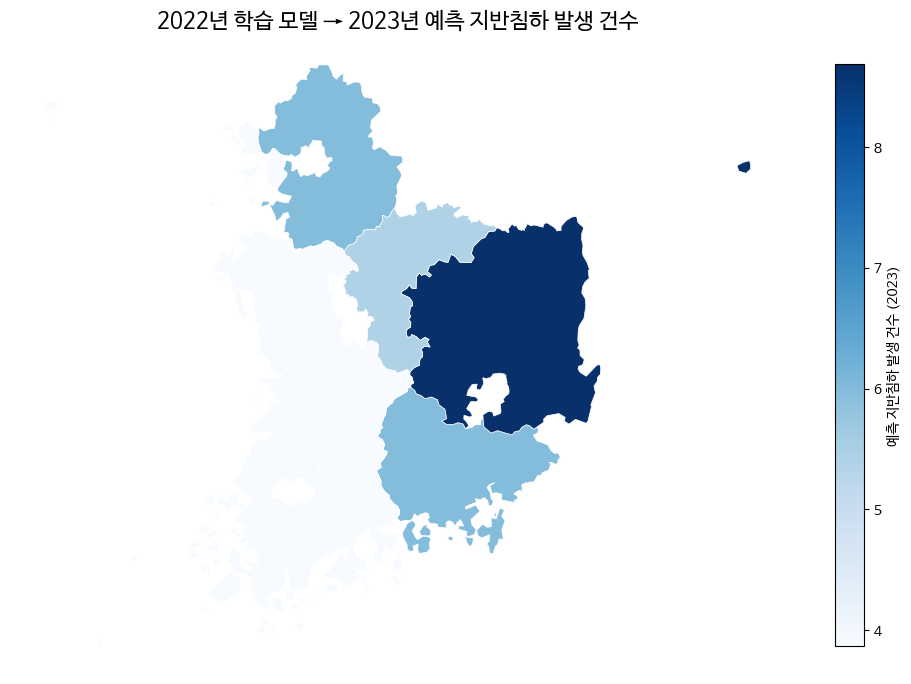

In [ ]:
import pandas as pd
import json
import geopandas as gpd
import matplotlib.pyplot as plt
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import r2_score, mean_absolute_error

# ─ 1) 데이터 로드 & 전처리
train = pd.read_csv("model_dataset_by_province21-22.csv", encoding="utf-8-sig")
train = train.rename(columns={"occurrences_2022":"occurrences"})
test  = pd.read_csv("model_dataset_by_province.csv", encoding="utf-8-sig")
test  = test.rename(columns={"occurrences_2023":"occurrences"})

for df in (train, test):
    for c in ["wl_pct_mean","exc_facility_160m","exc_usage_160m","occurrences"]:
        df[c] = df[c].astype(str).str.replace(",", "", regex=False).astype(float)

features = ["wl_pct_mean","exc_facility_160m","exc_usage_160m"]
X_train, y_train = train[features], train["occurrences"]
X_test,  y_test  = test [features],  test ["occurrences"]

# ─ 2) 모델 학습
pipe = Pipeline([
    ("scaler", StandardScaler()),
    ("gbr", GradientBoostingRegressor(
        n_estimators=100, max_depth=3, learning_rate=0.01, random_state=42
    ))
])
pipe.fit(X_train, y_train)

# ─ 3) 2023 예측
y_pred = pipe.predict(X_test)
test["predicted"] = y_pred
print(f"R²: {r2_score(y_test, y_pred):.3f}, MAE: {mean_absolute_error(y_test, y_pred):.1f}")

# ─ 4) 시도 경계 GeoJSON 불러오기
gdf = gpd.read_file("/content/drive/MyDrive/KOR_SIDO.json", encoding="utf-8")      # 파일 경로에 맞춰 수정
# GeoJSON의 'CTP_KOR_NM'이 시도명(Korean)임
gdf = gdf.rename(columns={"CTP_KOR_NM":"province"})

# ─ 5) 예측 결과 병합
map_df = gdf.merge(
    test[["province","predicted","occurrences"]],
    on="province",
    how="left"
)

# ─ 6) Choropleth 시각화
fig, ax = plt.subplots(1, 1, figsize=(10,10))
map_df.plot(
    column="predicted",
    cmap="Blues",
    edgecolor="white",
    linewidth=0.5,
    legend=True,
    legend_kwds={
        "label": "예측 지반침하 발생 건수 (2023)",
        "shrink": 0.6
    },
    ax=ax
)
ax.set_title("2022년 학습 모델 → 2023년 예측 지반침하 발생 건수", fontsize=16)
ax.axis("off")
plt.tight_layout()
plt.show()


▶ 예측 성능: R² = 0.081, MAE = 4.8 건


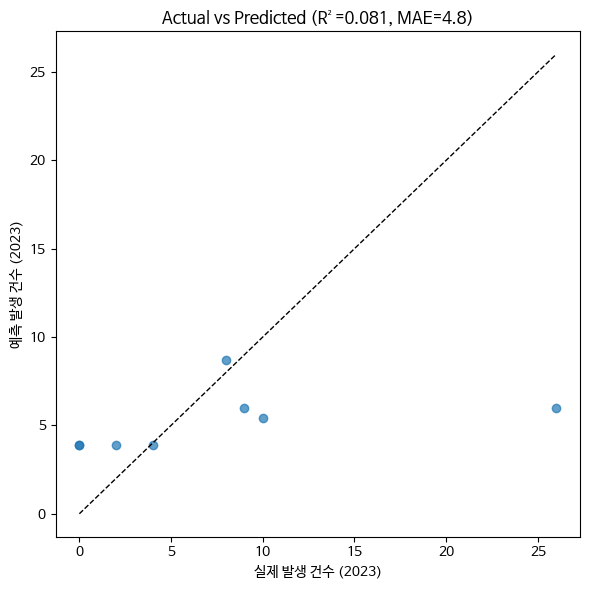

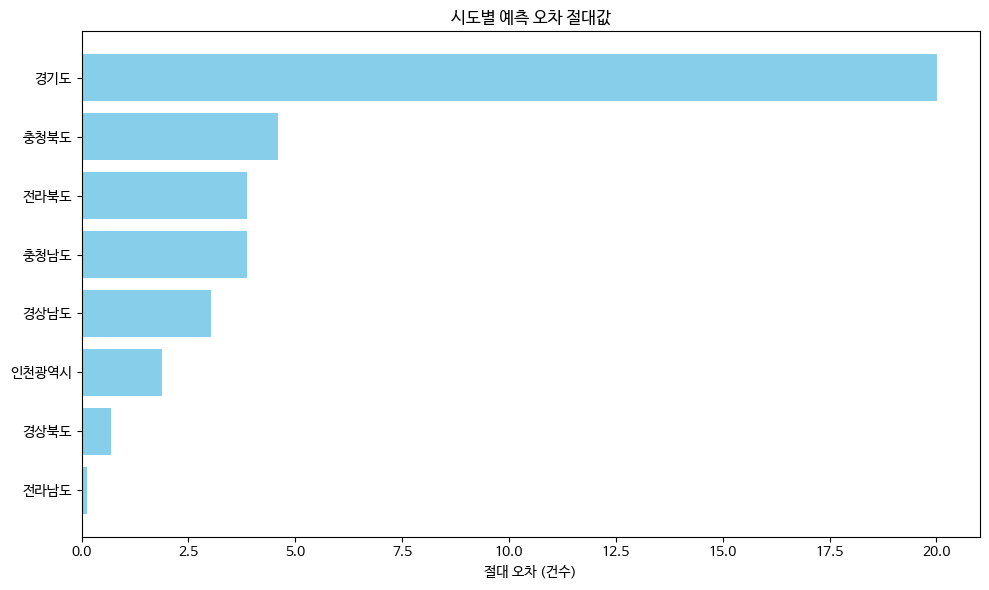

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import r2_score, mean_absolute_error

# 1) 2022→2023 모델 파이프라인 재구성 & 학습
train = pd.read_csv("model_dataset_by_province21-22.csv", encoding="utf-8-sig") \
          .rename(columns={"occurrences_2022":"occurrences"})
test  = pd.read_csv("model_dataset_by_province.csv",      encoding="utf-8-sig") \
          .rename(columns={"occurrences_2023":"actual"})

# 숫자형 쉼표 제거
for df in (train, test):
    for c in ["wl_pct_mean","exc_facility_160m","exc_usage_160m","occurrences","actual"]:
        if c in df.columns:
            df[c] = df[c].astype(str).str.replace(",", "", regex=False).astype(float)

# 특성 / 타깃 분리
X_train = train[["wl_pct_mean","exc_facility_160m","exc_usage_160m"]]
y_train = train["occurrences"]
X_test  = test [ ["wl_pct_mean","exc_facility_160m","exc_usage_160m"] ]
y_test  = test [ "actual" ]

# 파이프라인 정의 & 학습
pipe = Pipeline([
    ("scaler", StandardScaler()),
    ("gbr", GradientBoostingRegressor(
        n_estimators=100, max_depth=3, learning_rate=0.01, random_state=42
    ))
])
pipe.fit(X_train, y_train)

# 2) 예측값 추가
test["predicted"] = pipe.predict(X_test)

# 3) 평가 지표 출력
r2  = r2_score(test["actual"], test["predicted"])
mae = mean_absolute_error(test["actual"], test["predicted"])
print(f"▶ 예측 성능: R² = {r2:.3f}, MAE = {mae:.1f} 건")

# 4) 산점도: 실제 vs 예측
plt.figure(figsize=(6,6))
plt.scatter(test["actual"], test["predicted"], alpha=0.7)
mn, mx = min(test["actual"].min(), test["predicted"].min()), max(test["actual"].max(), test["predicted"].max())
plt.plot([mn, mx], [mn, mx], 'k--', lw=1)
plt.xlabel("실제 발생 건수 (2023)")
plt.ylabel("예측 발생 건수 (2023)")
plt.title(f"Actual vs Predicted (R²={r2:.3f}, MAE={mae:.1f})")
plt.tight_layout()
plt.show()

# 5) 시도별 막대그래프: 실제 vs 예측 차이
diff_df = test.copy().set_index("province")
diff_df["diff"] = np.abs(diff_df["predicted"] - diff_df["actual"])
diff_df = diff_df.sort_values("diff", ascending=False)

plt.figure(figsize=(10,6))
plt.barh(diff_df.index, diff_df["diff"], color="skyblue")
plt.xlabel("절대 오차 (건수)")
plt.title("시도별 예측 오차 절대값")
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()
